# Generate Geometry

## Weird Geometry Generation using nanomesh

In [2]:
from skimage.data import binary_blobs
from nanomesh import Image, Mesher2D

Plane(shape=(100, 100), range=(False,True), dtype=bool)


<Axes: title={'center': 'line mesh'}>

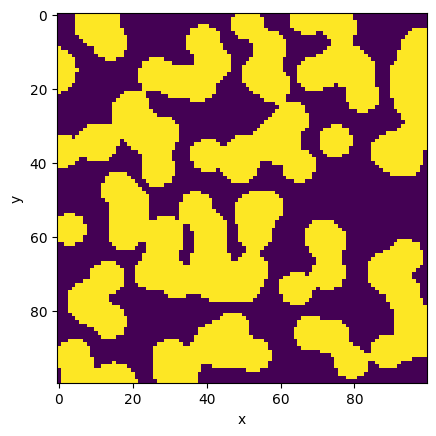

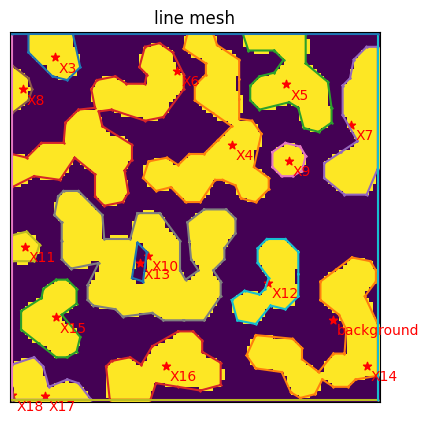

In [15]:
length = 100
blobs = binary_blobs(length=length, volume_fraction=0.5)
plane = Image(blobs)

print(plane)
plane.show()

mesh = Mesher2D(plane)
mesh.generate_contour(group_regions=False)
mesh.plot_contour(legend=None)

In [16]:
from ipycanvas import Canvas, hold_canvas
import numpy as np

scale = 416
canvas = Canvas(width=scale, height=scale)

with hold_canvas():
    for edge in mesh.contour.cells:
        i, j = edge
        A, B = mesh.contour.points[[i, j]] * (scale/length)
        canvas.stroke_line(A[0], A[1], B[0], B[1])
canvas

Canvas(height=416, width=416)

In [18]:
print(mesh.contour.cell_data)

{'segment_markers': array([ 1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,
        7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
     

## Translate to NGSolve

In [12]:
from ngsolve import Mesh
from netgen.geom2d import SplineGeometry
from netgen.webgui import Draw as DrawGeo

In [ ]:
geo = SplineGeometry()

points = [geo.AppendPoint(*x) for x in mesh.contour.points]

for edge in mesh.contour.cells:
    i, j = edge
    geo.AppendSegment([points[i], points[j]])

# Esto está muriendo. Creo que tiene que ver con la orientación.
# mesh = geo.GenerateMesh(maxh=1)
# DrawGeo(mesh)